# Setup

In [1]:
#! pip install mplhep > /dev/null
#! pip install zfit > /dev/null

In [2]:
# Following https://stackoverflow.com/a/64604031
# Importing python libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import sys
from pathlib import Path
from matplotlib._api import check_in_list
import pickle
import os
import tensorflow as tf
# Importing sympy to make calculations:
import sympy

from pathlib import Path

from math import pi
from numpy import cos, sin

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[1] / "py")

if module_path not in sys.path:
    sys.path.append(module_path)

2024-03-04 17:18:42.952194: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 17:18:42.992700: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 17:18:42.993446: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-04 17:18:43.740899: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
str(Path.cwd().parents[1] / "py")

'/home/carlos/projects/Ayudantia/py'

In [4]:
import plot_tools
import zfit
import customPDFs
import SLSQPv2 as SLSQP_zfit

/home/carlos/.local/lib/python3.8/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


# Integral calculations

## Verifying norm of the integral

In [ ]:
def transformation(FL, AFB, S39, thetaK, thetaL, phi):
    # The parameters S_3 and S_9 have been reduced to S_d u c e d   t9
  sum = 9/(16*pi)*(((3/4)*(1-FL)*(sin(thetaK))**2
        + FL*cos(thetaK)**2)
        + (1/4)*(1-FL)*sin(thetaK)**2 * cos(2*thetaL)
        - FL * cos(thetaK)**2 * cos(2*thetaL)
        + S39*sin(thetaK)**2 * sin(thetaL)**2 * cos(2*phi)
        + (4/3) * AFB * sin(thetaK)**2 * cos(thetaL) )
  return sum

In [5]:
# Defining the ranges of the variables for integration
x_range = (-1, 1)
y_range = (-1, 1)
phi_range = (-pi, 0) 

In [6]:
x, y, phi = sympy.symbols('c_k c_l phi', real = True)
F_L, A_FB, S = sympy.symbols('F_L, A, S', real = True, constant = True)

In [7]:
pdf_func = 9/(16*pi)*((3/4)*(1-F_L)*(1-x**2) + F_L*x**2 \
          + (1/4)*(1-F_L)*(1-x**2)*(2*y**2-1) \
          - F_L*x**2*(2*y**2-1) \
          + S*(1-x**2)*(1-y**2)*sympy.cos(2*phi) \
          + (4/3)*A_FB*(1-x**2)*y )

In [8]:
integral = sympy.integrate(pdf_func, x, y, phi)
integral

c_l**3*(-0.0298415518297304*F_L*c_k**3*phi - 0.0298415518297304*F_L*c_k*phi + 0.00994718394324346*S*c_k**3*sin(2*phi) - 0.0298415518297304*S*c_k*sin(2*phi) - 0.00994718394324346*c_k**3*phi + 0.0298415518297304*c_k*phi) + c_l**2*phi*(-0.0397887357729738*A*c_k**3 + 0.119366207318922*A*c_k) + c_l*(0.149207759148652*F_L*c_k**3*phi - 0.0895246554891911*F_L*c_k*phi - 0.0298415518297304*S*c_k**3*sin(2*phi) + 0.0895246554891911*S*c_k*sin(2*phi) - 0.0298415518297304*c_k**3*phi + 0.0895246554891911*c_k*phi)

In [9]:
print(integral)

c_l**3*(-0.0298415518297304*F_L*c_k**3*phi - 0.0298415518297304*F_L*c_k*phi + 0.00994718394324346*S*c_k**3*sin(2*phi) - 0.0298415518297304*S*c_k*sin(2*phi) - 0.00994718394324346*c_k**3*phi + 0.0298415518297304*c_k*phi) + c_l**2*phi*(-0.0397887357729738*A*c_k**3 + 0.119366207318922*A*c_k) + c_l*(0.149207759148652*F_L*c_k**3*phi - 0.0895246554891911*F_L*c_k*phi - 0.0298415518297304*S*c_k**3*sin(2*phi) + 0.0895246554891911*S*c_k*sin(2*phi) - 0.0298415518297304*c_k**3*phi + 0.0895246554891911*c_k*phi)


In [10]:
definite_int = sympy.integrate(pdf_func, (x,x_range[0],x_range[1]), (y,y_range[0],y_range[1]), (phi,phi_range[0],phi_range[1]))
definite_int.evalf()

1.74393424900432e-16*F_L - 3.89817183251938e-17*S + 1.0

# Partial integrals calculation

In [11]:
integral_cosk = sympy.integrate(pdf_func, x)

In [12]:
print(integral_cosk)

c_k**3*(-0.0795774715459477*A*c_l - 0.0895246554891911*F_L*c_l**2 + 0.149207759148652*F_L + 0.0596831036594608*S*c_l**2*cos(2*phi) - 0.0596831036594608*S*cos(2*phi) - 0.0298415518297304*c_l**2 - 0.0298415518297304) + c_k*(0.238732414637843*A*c_l - 0.0895246554891911*F_L*c_l**2 - 0.0895246554891911*F_L - 0.179049310978382*S*c_l**2*cos(2*phi) + 0.179049310978382*S*cos(2*phi) + 0.0895246554891911*c_l**2 + 0.0895246554891911)


In [13]:
integral_cosl = sympy.integrate(pdf_func, y)

In [14]:
print(integral_cosl)

c_l**3*(-0.0895246554891911*F_L*c_k**2 - 0.0298415518297304*F_L + 0.0596831036594608*S*c_k**2*cos(2*phi) - 0.0596831036594608*S*cos(2*phi) - 0.0298415518297304*c_k**2 + 0.0298415518297304) + c_l**2*(-0.119366207318922*A*c_k**2 + 0.119366207318922*A) + c_l*(0.447623277445956*F_L*c_k**2 - 0.0895246554891911*F_L - 0.179049310978382*S*c_k**2*cos(2*phi) + 0.179049310978382*S*cos(2*phi) - 0.0895246554891911*c_k**2 + 0.0895246554891911)


In [15]:
integral_phi = sympy.integrate(pdf_func, phi)

In [16]:
print(integral_phi)

0.238732414637843*A*c_l*phi*(1 - c_k**2) - 0.179049310978382*F_L*c_k**2*phi*(2*c_l**2 - 1) + 0.179049310978382*F_L*c_k**2*phi + 0.0895246554891911*S*(1 - c_k**2)*(1 - c_l**2)*sin(2*phi) + 0.179049310978382*phi*(0.25 - 0.25*F_L)*(1 - c_k**2)*(2*c_l**2 - 1) + 0.179049310978382*phi*(0.75 - 0.75*F_L)*(1 - c_k**2)


# Variables and constants config

In [17]:
# Number of points along each parameter axis to evaluate the PDF at
linsp_size_AFB = 21
linsp_size_FL = 13
linsp_size_S39 = 13

# Search range for the value of the parameters
afb_range = [-1,1]
fl_range = [-0.1,1.1]
s39_range = [-0.6,0.6]

# Numpy array over which plotting and evaluating happens
AFB_np = np.linspace(afb_range[0], afb_range[1], linsp_size_AFB)
FL_np = np.linspace(fl_range[0], fl_range[1], linsp_size_FL)
S39_np = np.linspace(s39_range[0], s39_range[1], linsp_size_S39)

In [18]:
# Mesh to plot the whole PDF

cosThetaK_np = np.linspace(-1, 1, 20)
#x_np = np.zeros(100)
cosThetaL_np = np.linspace(-1, 1, 20)
#y_np = np.zeros(100)
# Changed the range of phi to the whole integration region
phi_np = np.linspace(-pi, 0, 20)
#phi_np = np.ones(100) * pi/4

complete_space_list = []
for i in cosThetaK_np:
    for j in cosThetaL_np:
        for k in phi_np:
            item = (i,j,k)
            complete_space_list.append(item)
    #print(len(complete_space_list))

complete_space_np = np.array(complete_space_list).reshape(len(cosThetaK_np),len(cosThetaL_np),len(phi_np), 3)

# Zfit configuration

In [19]:
## Observables

cosThetaK = zfit.Space('cosThetaK', [-1,1], axes=0)
cosThetaL = zfit.Space('cosThetaL', [-1,1], axes=1)
phi = zfit.Space('phi', [-pi, 0], axes=2)

# Defining the ranges of the variables of the observable space

combined_obs = zfit.dimension.combine_spaces(cosThetaK,cosThetaL,phi)

In [20]:
phi.axes

(2,)

In [21]:
combined_obs = combined_obs.with_axes([0,1,2])

In [22]:
combined_obs.axes

(0, 1, 2)

In [23]:
## Parameters

AFB = zfit.Parameter('AFB', 0)
FL = zfit.Parameter('FL', 0)
S39 = zfit.Parameter('S39', 0)

In [24]:
version =  zfit.__version__.split('.')
if int(version[1])>=5:
    from zfit import z
else:
    from zfit import ztf as z

class decayWidth(zfit.pdf.BasePDF):
    '''
    Decay B^0 -> K^{*0} \mu^+ \mu^-
    Funciona directamente con el parámetro de phi
    '''
    _PARAMS = ['FL', 'AFB', 'S39']

    def __init__(self, FL, AFB, S39, obs, name="angular_dist" ):
        # se debe definir los parametros a pasar a la pdf
        params = {
              'FL': FL,
              'AFB': AFB,
              'S39': S39}
        super().__init__(obs, params, name=name )


    #def _unnormalized_pdf(self, x):
    def _pdf(self, x, norm_range):
        #print(x)
        #print(type(x))
        cosThetaK, cosThetaL, phi = z.unstack_x(x)

        #cos2phi = tf.math.cos(2*phi)

        FL = self.params['FL']
        AFB = self.params['AFB']
        S3 = self.params['S39']

        cosK2 = cosThetaK*cosThetaK
        cosL2 = cosThetaL*cosThetaL

        pdf = (3/4)*(1-FL)*(1-cosK2)
        pdf += FL*cosK2
        pdf += (1/4)*(1-FL)*(1-cosK2)*(2*cosL2-1)
        pdf += - FL*cosK2*(2*cosL2-1)
        pdf += S39*(1-cosK2)*(1-cosL2)*tf.math.cos(2*phi) 
        pdf += (4/3)*AFB*(1-cosK2)*cosThetaL
        pdf = pdf*9/(16*pi)

        return pdf
        
        

/home/carlos/.local/lib/python3.8/site-packages/zfit/core/basemodel.py:199: UserWarning: For the future, also decorate _pdf with @supports and specify what you support (such as 'norm=True' to keep the same behavior as before)
  warnings.warn(


In [25]:
# Analytic integral for the PDF function in each variable
#def an_int_ck(ck, cl, phi, AFB, FL, S39):
def an_int_ck(x, limits, norm_range, params, model):
    cosThetaK, cosThetaL, phi = z.unstack_x(x)

    FL = self.params['FL']
    AFB = self.params['AFB']
    S39 = self.params['S39']
    
    integral = cosThetaK**3*(-0.0795774715459477*AFB*cosThetaL 
            - 0.0895246554891911*FL*cosThetaL**2 
            + 0.149207759148652*FL 
            + 0.0596831036594608*S39*cosThetaL**2**tf.math.cos(2*phi) 
            - 0.0596831036594608*S39**tf.math.cos(2*phi) 
            - 0.0298415518297304*cosThetaL**2 
            - 0.0298415518297304) 
    + cosThetaK*(0.238732414637843*AFB*cosThetaL 
           - 0.0895246554891911*FL*cosThetaL**2 
           - 0.0895246554891911*FL 
           - 0.179049310978382*S39*cosThetaL**2**tf.math.cos(2*phi) 
           + 0.179049310978382*S39**tf.math.cos(2*phi) 
           + 0.0895246554891911*cosThetaL**2 
           + 0.0895246554891911)
    return integral

#params = {'AFB': AFB, 'FL': FL, 'S39': S39}

In [26]:
def an_int_cl(x, limits, norm_range, params, model):
    cosThetaK, cosThetaL, phi = z.unstack_x(x)

    FL = self.params['FL']
    AFB = self.params['AFB']
    S39 = self.params['S39']
    
    integral = cosThetaL**3*(-0.0895246554891911*FL*cosThetaK**2 
                       - 0.0298415518297304*FL 
                       + 0.0596831036594608*S39*cosThetaK**2*tf.math.cos(2*phi) 
                       - 0.0596831036594608*S39*tf.math.cos(2*phi) 
                       - 0.0298415518297304*cosThetaK**2 
                       + 0.0298415518297304) 
    + cosThetaL**2*(-0.119366207318922*AFB*cosThetaK**2 
              + 0.119366207318922*AFB) 
    + cosThetaL*(0.447623277445956*FL*cosThetaK**2 
           - 0.0895246554891911*FL 
           - 0.179049310978382*S39*cosThetaK**2*tf.math.cos(2*phi) 
           + 0.179049310978382*S39*tf.math.cos(2*phi) 
           - 0.0895246554891911*cosThetaK**2 
           + 0.0895246554891911)
    return integral

In [27]:
def an_int_phi(x, limits, norm_range, params, model):
    cosThetaK, cosThetaL, phi = z.unstack_x(x)

    FL = self.params['FL']
    AFB = self.params['AFB']
    S39 = self.params['S39']
    
    integral = 0.238732414637843*AFB*cosThetaL*phi*(1 - cosThetaK**2) 
    - 0.179049310978382*FL*cosThetaK**2*phi*(2*cosThetaL**2 - 1) 
    + 0.179049310978382*FL*cosThetaK**2*phi 
    + 0.0895246554891911*S39*(1 - cosThetaK**2)*(1 - cosThetaL**2)*tf.math.sin(2*phi) 
    + 0.179049310978382*phi*(0.25 - 0.25*FL)*(1 - cosThetaK**2)*(2*cosThetaL**2 - 1) 
    + 0.179049310978382*phi*(0.75 - 0.75*FL)*(1 - cosThetaK**2)
    
    return integral

In [28]:
def total_integral(cosThetaK, cosThetaL, phi, AFB, FL, S39):

    integral = cosThetaL**3*(-0.0298415518297304*FL*cosThetaK**3*phi 
                       - 0.0298415518297304*FL*cosThetaK*phi 
                       + 0.00994718394324346*S39*cosThetaK**3*tf.math.sin(2*phi) 
                       - 0.0298415518297304*S39*cosThetaK*tf.math.sin(2*phi) 
                       - 0.00994718394324346*cosThetaK**3*phi 
                       + 0.0298415518297304*cosThetaK*phi) 
    + cosThetaL**2*phi*(-0.0397887357729738*AFB*cosThetaK**3 
                  + 0.119366207318922*AFB*cosThetaK) 
    + cosThetaL*(0.149207759148652*FL*cosThetaK**3*phi 
           - 0.0895246554891911*FL*cosThetaK*phi 
           - 0.0298415518297304*S39*cosThetaK**3*tf.math.sin(2*phi) 
           + 0.0895246554891911*S39*cosThetaK*tf.math.sin(2*phi) 
           - 0.0298415518297304*cosThetaK**3*phi 
           + 0.0895246554891911*cosThetaK*phi)
    
    return integral

In [29]:
combined_obs.limits

(array([[-1.        , -1.        , -3.14159265]]), array([[1., 1., 0.]]))

In [30]:
def analytic_integral(x, limits, norm_range, params, model):
    fl = params['FL']
    afb = params['AFB']
    s39 = params['S39']

    lower, upper = limits.limits
    lower = lower[0]
    upper = upper[0]

    integral = total_integral(upper[0], upper[1], upper[2], afb, fl, s39) - total_integral(lower[0], lower[1], lower[2], afb, fl, s39)
    print("Integral called")
    return integral
    

In [31]:
cosThetaL.axes

(1,)

In [32]:
limits_param = ([zfit.Space.ANY, zfit.Space.ANY, zfit.Space.ANY], [zfit.Space.ANY, zfit.Space.ANY, zfit.Space.ANY])
integral_limits = zfit.Space(axes=(0,1,2), limits = limits_param)
#integral_limits = integral_limits.with_limits([()])

In [33]:
# # Getting a random test point
# lower1, upper1 = [-1,-1,-pi], [1,1,0]
# integral_limits = zfit.Space(['cosThetaK', 'cosThetaL', 'phi'], axes=(0,1,2), limits = (lower1, upper1))

# for indx, test_point_bool in enumerate(valid_test_points):
#     if (test_point_bool == False):
#         AFB.set_value(test_points[indx][0])
#         FL.set_value(test_points[indx][1])
#         S39.set_value(test_points[indx][2])
#         decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
#         #dr_pdf = decay_rate.pdf(complete_space_np)
#         print(indx,test_point_bool, AFB.value, FL.value, S39.value)
#         print("Numerically integrating!")
#         num_integral = decay_rate.numeric_integrate(integral_limits)
#         print("Numpy: ", num_integral.numpy())
#         print("Analitically integrating")
#         analytic_integral = decay_rate.integrate(integral_limits)
#         print("Numpy: ", analytic_integral.numpy())
#         break

# for indx, test_point_bool in enumerate(valid_test_points):
#     if (test_point_bool == True):
#         AFB.set_value(test_points[indx][0])
#         FL.set_value(test_points[indx][1])
#         S39.set_value(test_points[indx][2])
#         decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
#         #dr_pdf = decay_rate.pdf(complete_space_np)
#         print(indx,test_point_bool, AFB.value, FL.value, S39.value)
#         print("Numerically integrating!")
#         num_integral = decay_rate.numeric_integrate(integral_limits)
#         print("Numpy: ", num_integral.numpy())
#         print("Analitically integrating")
#         analytic_integral = decay_rate.integrate(integral_limits)
#         print("Numpy: ", analytic_integral.numpy())
#         break

In [34]:
# decayWidth.register_analytic_integral(
#     an_int_ck, cosThetaK
# )
# decayWidth.register_analytic_integral(
#     an_int_cl, cosThetaL
# )
# decayWidth.register_analytic_integral(
#     an_int_phi, p-hi
# )
# define the space over which it is defined. Here, we use the axes


decayWidth.register_analytic_integral(
    analytic_integral, integral_limits, #supports_multiple_limits=True
)

In [35]:
AFB.set_value(0)
FL.set_value(0.4) # Changing the parameters just outside the allowed region
S39.set_value(0)

In [36]:
decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit

In [37]:
#integral_analytic = decay_rate.integrate(limits=[(-1, -1, 0),(1,1,pi)])

In [38]:
# Creating an instance of the PDF
dr_pdf = decay_rate.pdf(complete_space_np)

In [39]:
res_norm = decay_rate.normalization(combined_obs)
res_norm

Integral called


<tf.Tensor: shape=(), dtype=float64, numpy=-0.012499999999999997>

In [40]:
def evaluate_validity_pdf(pdf):
    valid_pdf = True
    complete_space_list = []
    for i, _i in enumerate(cosThetaK_np):
        for j, _j in enumerate(cosThetaL_np):
            for k, _k in enumerate(phi_np):
                if pdf[i,j,k].numpy() < 0:
                    print(f"PDF invalid at")
                    print(f"cosThetaK[{i}] = {_i}")
                    print(f"cosThetaL[{j}] = {_j}")
                    print(f"phi[{k}] = {_k}")
                    print(f'value = {pdf[i,j,k].numpy()}')
                    valid_pdf = False
                    break
            if not valid_pdf:
                break
        if not valid_pdf:
            break
    return valid_pdf

In [41]:
evaluate_validity_pdf(dr_pdf)

True

In [42]:
valid_res = evaluate_validity_pdf(dr_pdf)

In [43]:
valid_res

True

In [44]:
valid_points_FL = []
valid_points_AFB = []

In [45]:
def calculating_valid_pdfs(s39_val):
    s39_str = "{:.2f}".format(s39_val)
    path = f'np_arrays/afb_{afb_range[0]}_{afb_range[1]}_fl_{fl_range[0]}_{fl_range[1]}_s39-{s39_str}.npy'
    if not os.path.isfile(path):
        valid_list = []
        S39.set_value(s39_val)
        for i, afb_ in enumerate(AFB_np):
            AFB.set_value(afb_)
            for j, fl_ in enumerate(FL_np):
                FL.set_value(fl_)
                decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
                dr_pdf = decay_rate.pdf(complete_space_np)
                valid_list.append(evaluate_validity_pdf(dr_pdf))
        valid_np = np.array(valid_list).reshape(len(AFB_np), len(FL_np))
        np.save(f'np_arrays/afb_{afb_range[0]}_{afb_range[1]}_fl_{fl_range[0]}_{fl_range[1]}_s39-{s39_str}.npy', valid_np)
    else: 
        valid_np = np.load(path)
        #print(valid_np)

    valid_points_FL = []
    valid_points_AFB = []
    valid_coordinates = []
    
    for i, vnp_afb in enumerate(valid_np):
        for j, vnp_fl in enumerate(vnp_afb):
            if vnp_fl==True:
                valid_points_FL.append(FL_np[j])
                valid_points_AFB.append(AFB_np[i])
                valid_coordinates.append((AFB_np[i], FL_np[j], s39_val))
    # Plotting
    plt.figure(figsize=(5,5))
    plt.scatter(valid_points_AFB, valid_points_FL)
    plt.axis((afb_range[0], afb_range[1], fl_range[0], fl_range[1]))
    plt.xlabel('$A_{FB}$')
    plt.ylabel('$F_L$')
    plt.title('$S_{39}='+str(s39_val)+'$')
    plt.savefig(f'afb_{afb_range[0]}_{afb_range[1]}_fl_{fl_range[0]}_{fl_range[1]}_s39-{s39_str}.png')
    plt.show()

    return valid_coordinates 

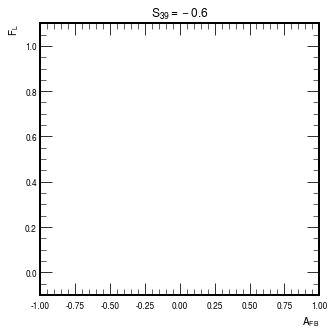

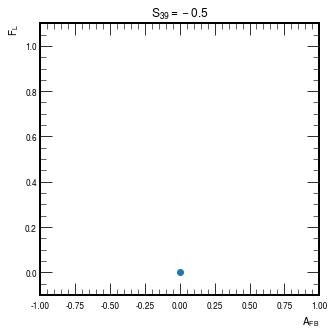

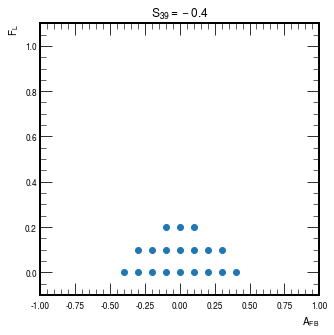

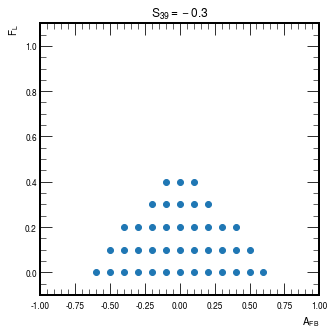

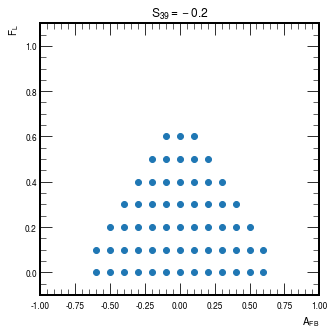

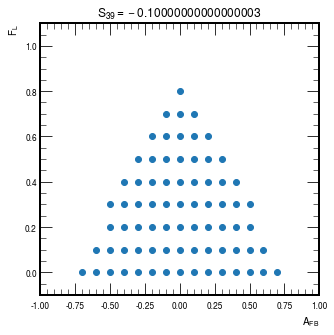

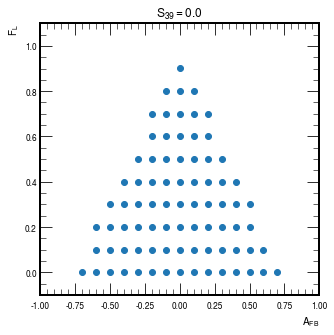

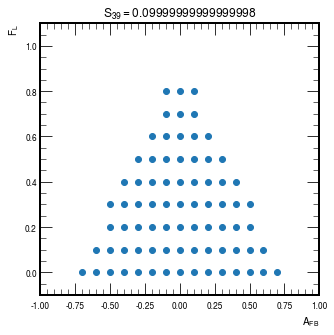

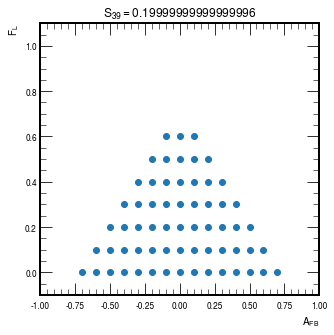

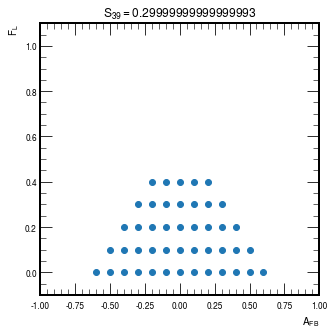

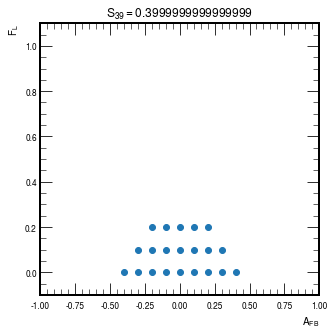

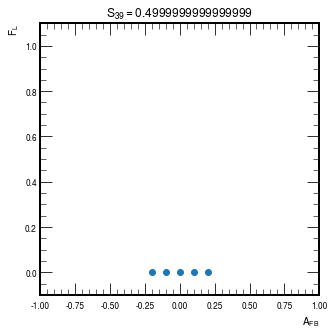

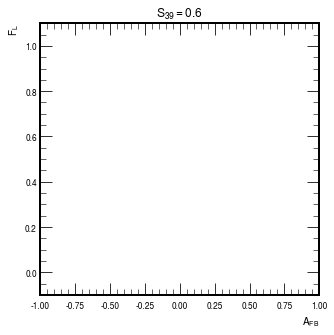

--- 5.260847091674805 seconds ---


In [46]:
start_time = time.time()
valid_coordinates = []
for s39 in S39_np:
    valid_coordinates += calculating_valid_pdfs(s39)
#calculating_valid_pdfs(S39_np[2])
print("--- %s seconds ---" % (time.time() - start_time))

In [47]:
valid_coordinates

[(0.0, 1.3877787807814457e-17, -0.5),
 (-0.3999999999999999, 1.3877787807814457e-17, -0.4),
 (-0.29999999999999993, 1.3877787807814457e-17, -0.4),
 (-0.29999999999999993, 0.10000000000000003, -0.4),
 (-0.19999999999999996, 1.3877787807814457e-17, -0.4),
 (-0.19999999999999996, 0.10000000000000003, -0.4),
 (-0.09999999999999998, 1.3877787807814457e-17, -0.4),
 (-0.09999999999999998, 0.10000000000000003, -0.4),
 (-0.09999999999999998, 0.20000000000000004, -0.4),
 (0.0, 1.3877787807814457e-17, -0.4),
 (0.0, 0.10000000000000003, -0.4),
 (0.0, 0.20000000000000004, -0.4),
 (0.10000000000000009, 1.3877787807814457e-17, -0.4),
 (0.10000000000000009, 0.10000000000000003, -0.4),
 (0.10000000000000009, 0.20000000000000004, -0.4),
 (0.20000000000000018, 1.3877787807814457e-17, -0.4),
 (0.20000000000000018, 0.10000000000000003, -0.4),
 (0.30000000000000004, 1.3877787807814457e-17, -0.4),
 (0.30000000000000004, 0.10000000000000003, -0.4),
 (0.40000000000000013, 1.3877787807814457e-17, -0.4),
 (-0.6,

In [48]:
S39.set_value(0)
AFB.set_value(0)
FL.set_value(0.8)
decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
dr_pdf = decay_rate.pdf(complete_space_np)
print(evaluate_validity_pdf(dr_pdf))


True


## Plotting in 3D the constraints

In [49]:
valid_coordinates_np = np.array(valid_coordinates)
#valid_coordinates_np[:,2]

In [50]:
#!pip install ipympl

In [51]:
%matplotlib widget

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

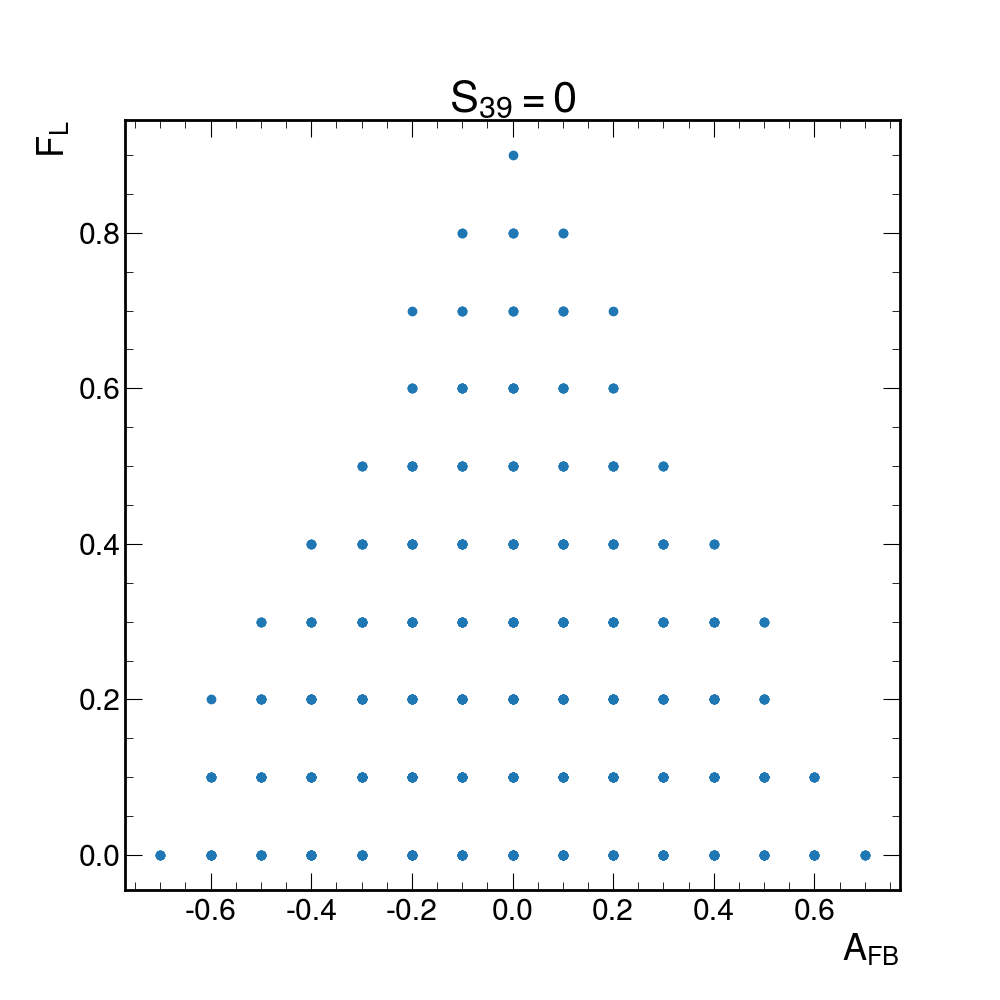

In [52]:
fig = plt.figure()
plt.scatter(valid_coordinates_np[:,0], valid_coordinates_np[:,1])
plt.ylabel('$F_{L}$')
plt.xlabel('$A_{FB}$')
plt.title('$S_{39}=0$')
plt.plot

Text(0.5, 1.0, '$F_{L}=0$')

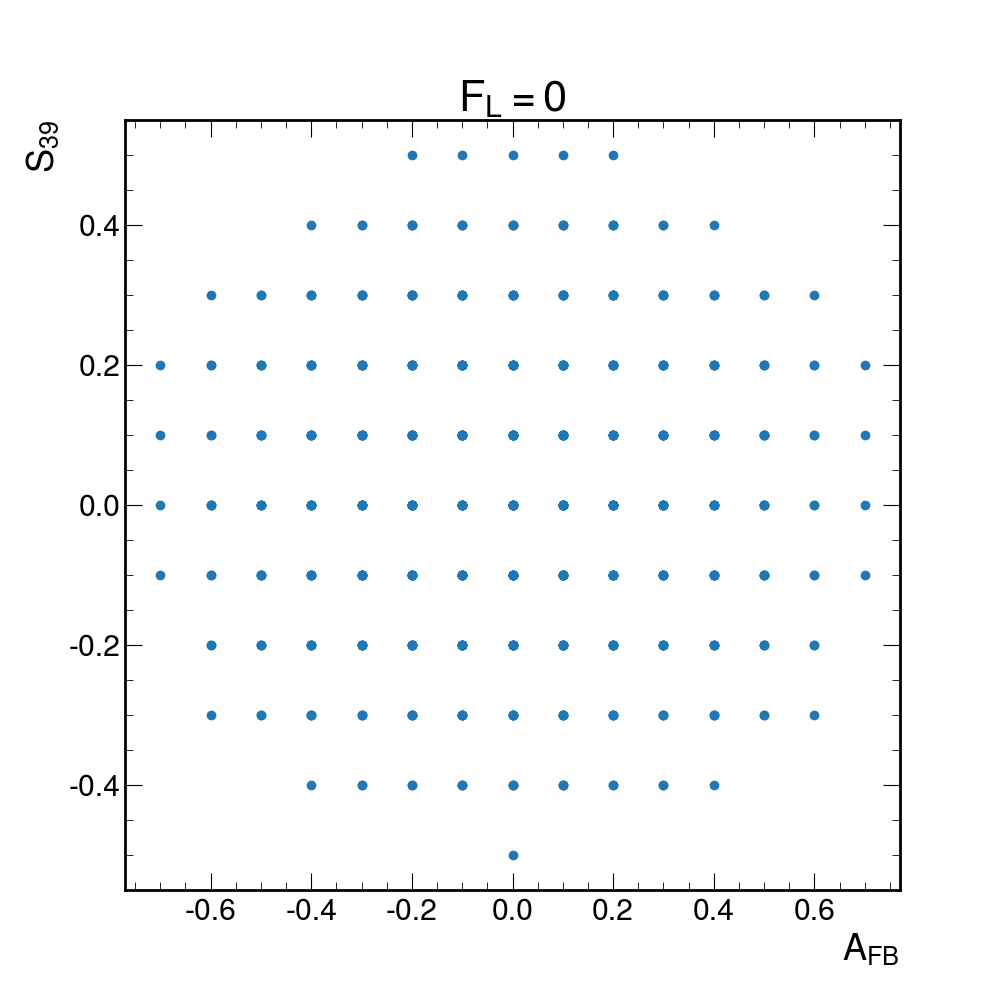

In [53]:
fig = plt.figure()
plt.scatter(valid_coordinates_np[:,0], valid_coordinates_np[:,2])
plt.xlabel('$A_{FB}$')
plt.ylabel('$S_{39}$')
plt.title('$F_{L}=0$')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

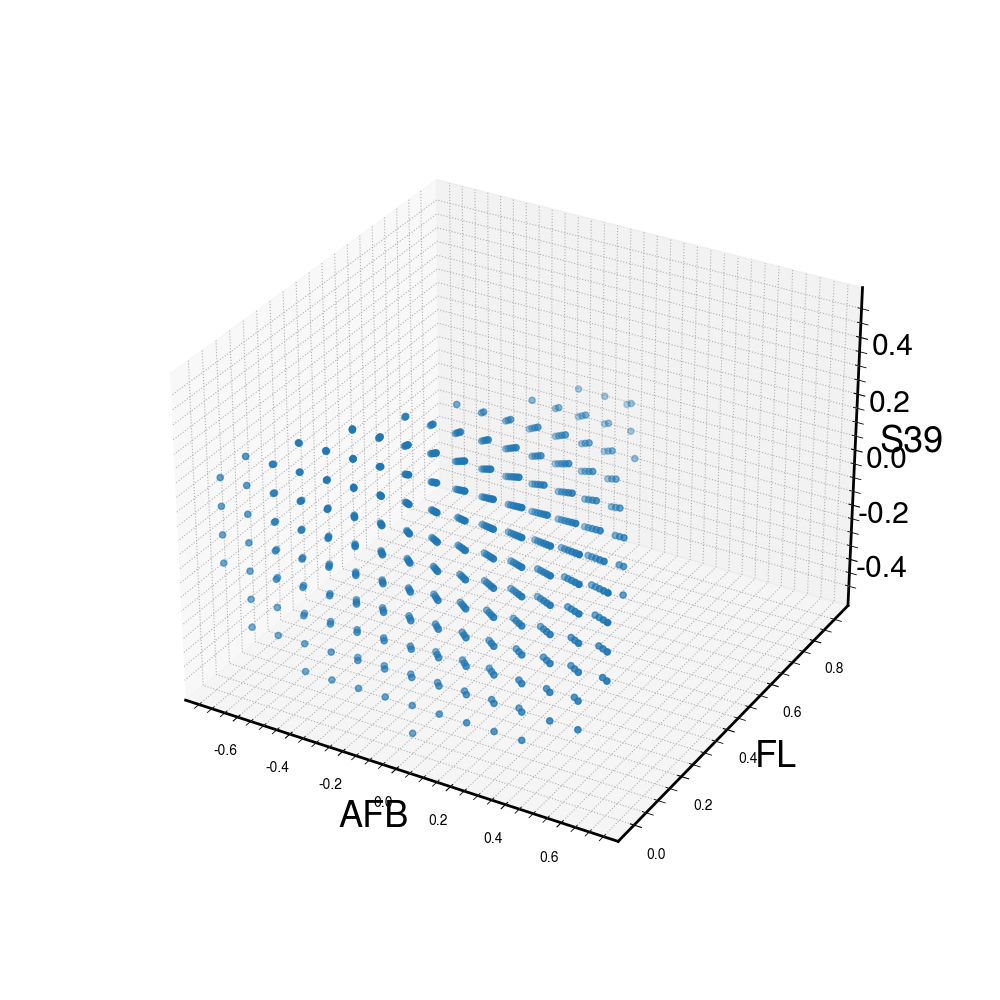

In [54]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(valid_coordinates_np[:,0], valid_coordinates_np[:,1], valid_coordinates_np[:,2], marker='o')

ax.set_xlabel('AFB')
ax.set_ylabel('FL')
ax.set_zlabel('S39')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [55]:
# Defining a function for the possible values
def f(x,y):
    z_np = np.sqrt(16*x**2/9 + 4*y**2)-1
    return z_np
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
x = 0.75*np.cos(u)*np.sin(v)
y = 0.5*np.sin(u)*np.sin(v)
z_np = -f(x, y)

In [56]:
x

array([[0.00000000e+00, 2.37959501e-02, 4.75679397e-02, ...,
        4.75679397e-02, 2.37959501e-02, 9.18485099e-17],
       [0.00000000e+00, 2.37480412e-02, 4.74721701e-02, ...,
        4.74721701e-02, 2.37480412e-02, 9.16635892e-17],
       [0.00000000e+00, 2.36045073e-02, 4.71852468e-02, ...,
        4.71852468e-02, 2.36045073e-02, 9.11095715e-17],
       ...,
       [0.00000000e+00, 2.36045073e-02, 4.71852468e-02, ...,
        4.71852468e-02, 2.36045073e-02, 9.11095715e-17],
       [0.00000000e+00, 2.37480412e-02, 4.74721701e-02, ...,
        4.74721701e-02, 2.37480412e-02, 9.16635892e-17],
       [0.00000000e+00, 2.37959501e-02, 4.75679397e-02, ...,
        4.75679397e-02, 2.37959501e-02, 9.18485099e-17]])

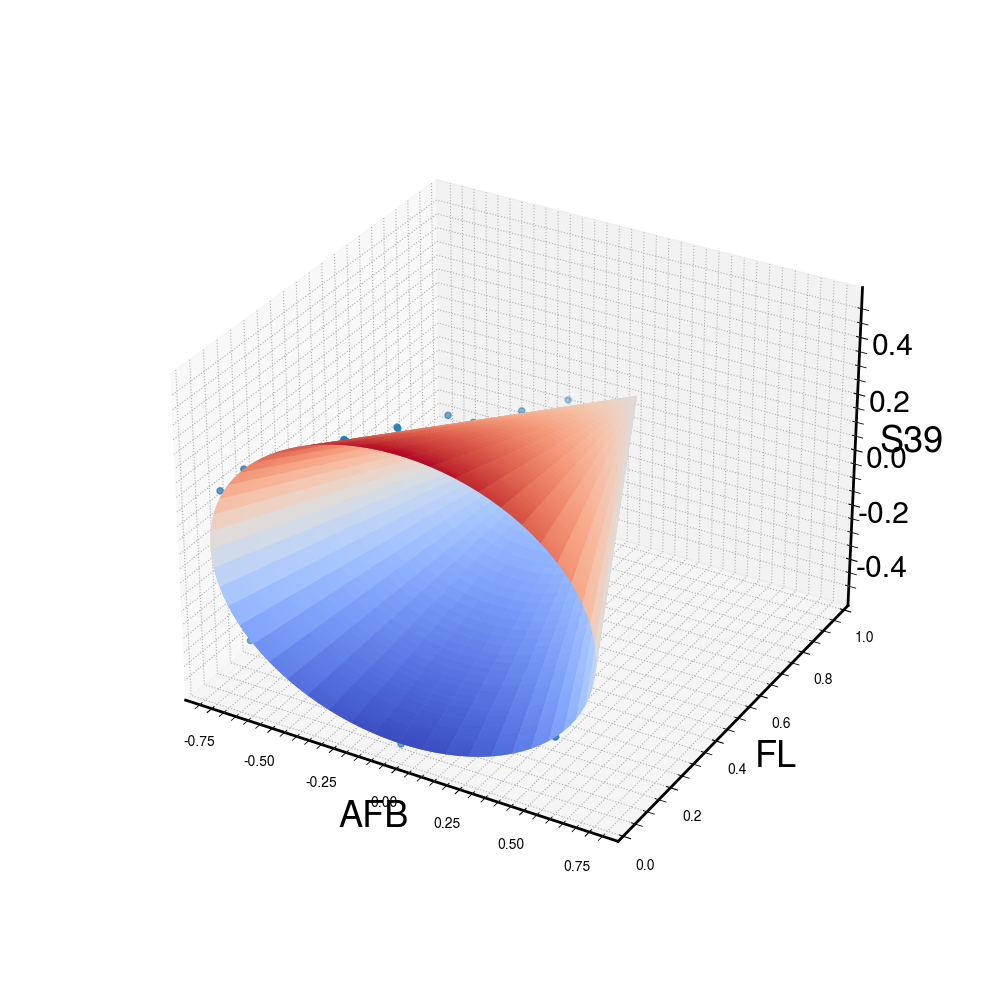

In [57]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(valid_coordinates_np[:,0], valid_coordinates_np[:,1], valid_coordinates_np[:,2], marker='o')

ax.set_xlabel('AFB')
ax.set_ylabel('FL')
ax.set_zlabel('S39')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.plot_surface(x, z_np, y, cmap=cm.coolwarm)
ax.set_ylim([0, 1])
plt.show()

In [58]:
#plt.close()

# Tests for restrictions

In [59]:
from numpy.random import seed
from numpy.random import rand

In [60]:
# Generating random numbers
fl_rand = 1*rand(1000)
#fl_rand = 0.4*rand(1000)

In [61]:
fl_min_1 = []
for val in fl_rand:
    fl_min_1.append((val-1)**2)

In [62]:
def cone_restriction(x):
    flag = True
    values = []
    sum = 0
    while flag:
        afb = 1.5*rand()-0.75
        s39 = rand() - 0.5
        sum = (16*afb**2/9) + (4*s39**2)
        if sum <= x:
            values = [afb, s39]
            flag = False
    return values

In [63]:
test_points = []
for i, fl_ in enumerate(fl_min_1):
    afb_, s39_ = cone_restriction(fl_)
    test_points.append([afb_, fl_rand[i], s39_])
test_points = np.array(test_points)

In [64]:
#test_points

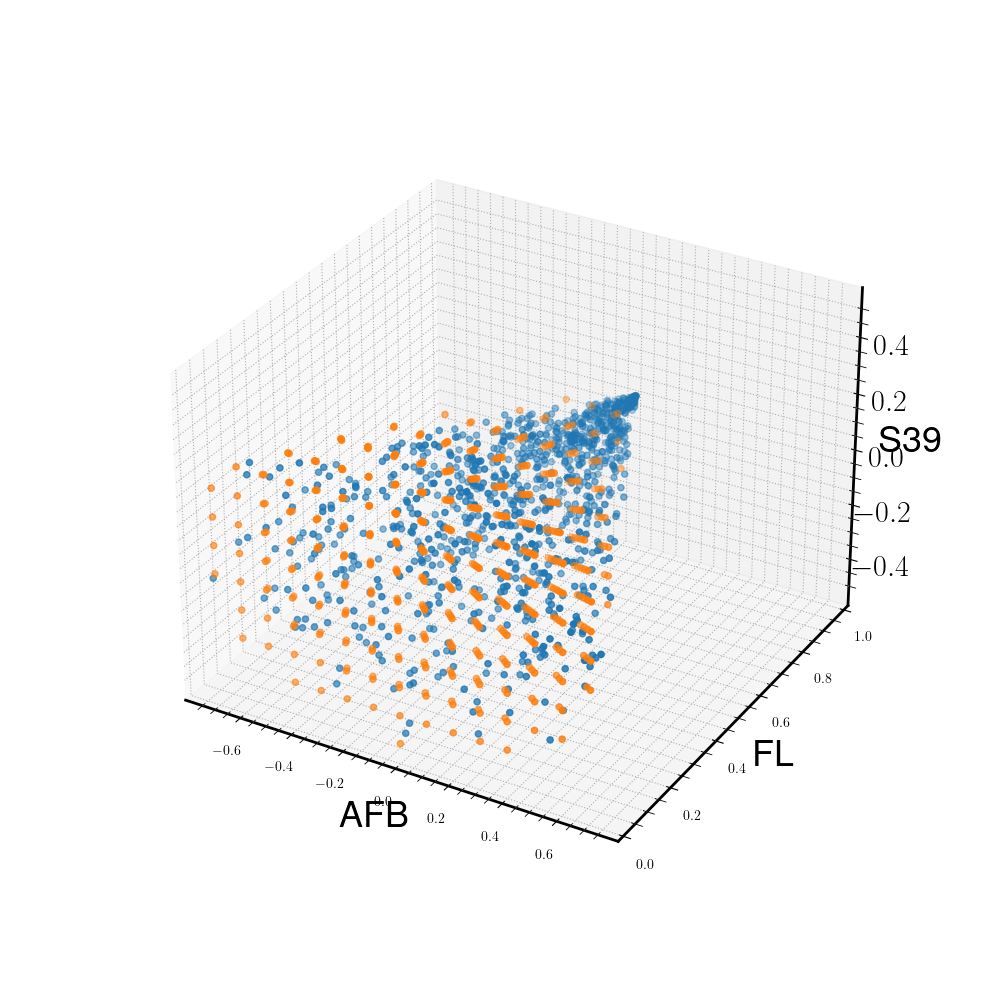

In [134]:
# Testing with random
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.set_xlabel('AFB')
ax.set_ylabel('FL')
ax.set_zlabel('S39')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#ax.plot_surface(x, -z, y, cmap=cm.hot, ec='k')
ax.set_ylim([0, 1])
ax.scatter(test_points[:,0], test_points[:,1], test_points[:,2], marker='o')
ax.scatter(valid_coordinates_np[:,0], valid_coordinates_np[:,1], valid_coordinates_np[:,2], marker='o')
plt.show()

In [66]:
type(complete_space_np)

numpy.ndarray

In [67]:
complete_space = zfit.Data.from_numpy(combined_obs, complete_space_np)

In [68]:
# valid_test_points = []
# for test_point in test_points:
#     AFB.set_value(test_point[0])
#     FL.set_value(test_point[1])
#     S39.set_value(test_point[2])
#     decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
#     dr_pdf = decay_rate.pdf(complete_space_np)
#     #dr_pdf = decay_rate.pdf(complete_space)
#     result = evaluate_validity_pdf(dr_pdf)
#     if not result:
#         print(f"(AFB, FL, S39) = ({test_point[0]}, {test_point[1]}, {test_point[2]}) No es válido")
#     valid_test_points.append(result)

KeyboardInterrupt: 

In [ ]:
# bool_arr = np.array(valid_test_points, dtype='bool') 
# bool_arr.sum()

# Numerical integral vs Analytic integral

In [69]:
# Getting a random test point
lower1, upper1 = [-1,-1,-pi], [1,1,0]
integral_limits = zfit.Space(['cosThetaK', 'cosThetaL', 'phi'], axes=(0,1,2), limits = (lower1, upper1))

for indx, test_point_bool in enumerate(valid_test_points):
    if (test_point_bool == False):
        AFB.set_value(test_points[indx][0])
        FL.set_value(test_points[indx][1])
        S39.set_value(test_points[indx][2])
        decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
        #dr_pdf = decay_rate.pdf(complete_space_np)
        print(indx,test_point_bool, AFB.value, FL.value, S39.value)
        print("Numerically integrating!")
        num_integral = decay_rate.numeric_integrate(integral_limits)
        print("Numpy: ", num_integral.numpy())
        print("Analitically integrating")
        analytic_integral_val = decay_rate.analytic_integrate(integral_limits)
        print("Numpy: ", analytic_integral_val.numpy())
        break

for indx, test_point_bool in enumerate(valid_test_points):
    if (test_point_bool == True):
        AFB.set_value(test_points[indx][0])
        FL.set_value(test_points[indx][1])
        S39.set_value(test_points[indx][2])
        decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
        #dr_pdf = decay_rate.pdf(complete_space_np)
        print(indx,test_point_bool, AFB.value, FL.value, S39.value)
        print("Numerically integrating!")
        num_integral = decay_rate.numeric_integrate(integral_limits)
        print("Numpy: ", num_integral.numpy())
        print("Analitically integrating")
        analytic_integral_val = decay_rate.analytic_integrate(integral_limits)
        print("Numpy: ", analytic_integral_val.numpy())
        break

0 True <bound method Parameter.value of <zfit.Parameter 'AFB' floating=True value=-0.08743>> <bound method Parameter.value of <zfit.Parameter 'FL' floating=True value=0.4571>> <bound method Parameter.value of <zfit.Parameter 'S39' floating=True value=-0.1895>>
Numerically integrating!
Numpy:  [1.]
Analitically integrating
Integral called
Integral called
Numpy:  1.0


In [70]:
# With numeric integral
S39.set_value(0)
#for i, afb_ in enumerate(AFB_np):
AFB.set_value(0)
    #for j, fl_ in enumerate(FL_np):
FL.set_value(0.5)
decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
dr_pdf = decay_rate.pdf(complete_space_np)
print(dr_pdf.numpy())

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.03571067 0.03571067 0.03571067 ... 0.03571067 0.03571067 0.03571067]
  [0.06745348 0.06745348 0.06745348 ... 0.06745348 0.06745348 0.06745348]
  ...
  [0.06745348 0.06745348 0.06745348 ... 0.06745348 0.06745348 0.06745348]
  [0.03571067 0.03571067 0.03571067 ... 0.03571067 0.03571067 0.03571067]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.01785533 0.01785533 0.01785533 ... 0.01785533 0.01785533 0.01785533]
  [0.04466306 0.04466306 0.04466306 ... 0.04466306 0.04466306 0.04466306]
  [0.06849216 0.06849216 0.06849216 ... 0.06849216 0.06849216 0.06849216]
  ...
  [0.06849216 0.06849216 0.06849216 ... 0.06849216 0.06849216 0.06849216]
  [0.04466306 0.04466306 0.04466306 ... 0.04466306 0.04466306 0.04466306]
  [0.01785533 0.01785533 0.01785533 ... 0.01785533 0.01785533 0.01785533]]

 [[0.03372674 0.03372674 0.03372674 ... 0.03372674 0.03372674 0.03372674]
  [0.05262075 0.052620

In [ ]:
# # Defined with _pdf and not _unnormalized_pdf
# # With numeric integral

# S39.set_value(0)
# #for i, afb_ in enumerate(AFB_np):
# AFB.set_value(0)
#     #for j, fl_ in enumerate(FL_np):
# FL.set_value(0.5)
# decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
# dr_pdf = decay_rate.pdf(complete_space_np)
# print(dr_pdf.numpy())

In [ ]:
# # With analytic integral
# S39.set_value(0)
# #for i, afb_ in enumerate(AFB_np):
# AFB.set_value(0)
#     #for j, fl_ in enumerate(FL_np):
# FL.set_value(0.5)
# decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
# dr_pdf = decay_rate.pdf(complete_space_np)
# print(dr_pdf.numpy())

In [ ]:
# # Defined with _pdf and not _unnormalized_pdf
# # With analytic integral

# S39.set_value(0)
# #for i, afb_ in enumerate(AFB_np):
# AFB.set_value(0)
#     #for j, fl_ in enumerate(FL_np):
# FL.set_value(0.5)
# decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
# dr_pdf = decay_rate.pdf(complete_space_np)
# print(dr_pdf.numpy())

# Minimization

In [71]:
path = './samplers/'

In [72]:
# Sampler size of 100,000 events = 1e5
sampler_size = 1e5

In [73]:
ft = 1e-10

In [74]:
AFB.set_value(0.3)
FL.set_value(0.5)
S39.set_value(0.2)

dr = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit

In [75]:
# Generating and saving the sampler
#dr = decay_rate_lst[2]

AFB_val = dr.params['AFB'].value().numpy()
FL_val = dr.params['FL'].value().numpy()
S39_val = dr.params['S39'].value().numpy()

AFB.set_value(AFB_val),
FL.set_value(FL_val)
S39.set_value(S39_val)

filename = f'{path}drs_AFB_{AFB_val}_FH_{FL_val}_S39_{S39}.npy'

# The PDf doesn´t save the values of the parameters themselves
# AFB.set_value(decay_rate_lst[-1].params['AFB'].value().numpy())
# FH.set_value(decay_rate_lst[-1].params['FH'].value().numpy())

sampler_1 = dr.create_sampler(sampler_size)

if os.path.exists(filename):
    #sampler_lst.append(sampler.from_numpy(cos, np.load(filename)))
    sampler_1 = sampler_1.from_numpy(complete_space, np.load(filename))
else:
    sampler_1.resample()
    np.save(filename, sampler_1.numpy())
    #sampler_lst.append(sampler)
#print(sampler_lst[-1])
# 
plt.hist(sampler_1.numpy(), bins=20, range=[-1,1])

(array([[7182., 6331., 5867., 5380., 4752., 4513., 4358., 4029., 3864.,
         3744., 3811., 3887., 3860., 4148., 4506., 4989., 5355., 5904.,
         6359., 7161.],
        [1100., 1688., 2296., 2863., 3410., 3907., 4250., 4748., 5062.,
         5639., 5813., 6149., 6179., 6558., 6649., 6665., 6788., 6730.,
         6807., 6699.],
        [3082., 3145., 3263., 3373., 3491., 3606., 3589., 3739., 3771.,
         3940.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.]]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 3 BarContainer objects>)

In [76]:
result_df = pd.DataFrame(columns=['Minimizer', 'tol', 'AFB', 'hessAFB', 'FL', 'hessFL', 'S39', 'hessS39', 'time'])

In [77]:
dir(SLSQP_zfit)

['BaseMinimizer',
 'CRITERION_NOT_AVAILABLE',
 'Callable',
 'ConvergenceCriterion',
 'FitResult',
 'Mapping',
 'NOT_SUPPORTED',
 'Optional',
 'SLSQP',
 'ScipyBaseMinimizerV1',
 'Union',
 'ZfitStrategy',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'copy',
 'create_constraint',
 'inspect',
 'math',
 'minimize_supports',
 'print_minimization_status']

In [78]:
index_count = 0

In [79]:
AFB.set_value(0)
FL.set_value(0)
S39.set_value(0)

decay_rate = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit
dr_pdf = decay_rate.pdf(complete_space_np)

nll = zfit.loss.UnbinnedNLL(decay_rate, sampler_1)

# AFB.set_value(0.5)
# FH.set_value(2.5)

#constraints = SLSQP_zfit.create_constraint(decay_rate)

MIN = zfit.minimize.Minuit()
# Minimization time =====================================
start = time.time()
# Minimization with zfit minuit
minimum = MIN.minimize(nll)
print(minimum)

end = time.time()
time_dif = end - start
print("Minimization time with Minuit", time_dif)

# Hessian error calculator time =========================
start_h = time.time()

minimum.hesse()

end_h = time.time()
print("Hessian error time with Minuit", end_h - start_h)

result_df.loc[index_count] = ['Minuit 0.16.0', 
                     "{:.3g}".format(ft), 
                     round(minimum.params[AFB]['value'], 8),
                     round(minimum.hesse()[AFB]['error'],8),
                     round(minimum.params[FL]['value'], 8),
                     round(minimum.hesse()[FL]['error'],8),
                     round(minimum.params[S39]['value'], 8),
                     round(minimum.hesse()[S39]['error'],8),
                     time_dif]
index_count += 1

/home/carlos/.local/lib/python3.8/site-packages/zfit/core/loss.py:296: AdvancedFeatureWarning: Either you're using an advanced feature OR causing unwanted behavior. To turn this warning off, use `zfit.settings.advanced_warnings['inconsistent_fitrange'] = False`  or 'all' (use with care) with `zfit.settings.advanced_warnings['all'] = False
PDFs [<zfit.<class '__main__.decayWidth'>  params=[AFB, FL, S39]] as well as `data` [<zfit.core.data.Data object at 0x7fe8f94c8370>] have different ranges [(<zfit Space obs=('cosThetaK', 'cosThetaL', 'phi'), axes=(0, 1, 2), limits=rectangular, binned=False>, <zfit Space obs=('cosThetaK', 'cosThetaL', 'phi'), axes=(0, 1, 2), limits=None, binned=False>)] they are defined in. The data range will cut the data while the norm range defines the normalization.
  warn_advanced_feature(


FitResult of
<UnbinnedNLL model=[<zfit.<class '__main__.decayWidth'>  params=[AFB, FL, S39]] data=[<zfit.core.data.Data object at 0x7fe8f94c8370>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤══════════════════════════════════╕
│  valid  │  converged  │  param at limit  │   edm   │   approx. fmin (full | internal) │
╞═════════╪═════════════╪══════════════════╪═════════╪══════════════════════════════════╡
│  True   │    True     │      False       │ 7.7e-05 │            235967.80 | -49198.85 │
╘═════════╧═════════════╧══════════════════╧═════════╧══════════════════════════════════╛

Parameters
name      value  (rounded)    at limit
------  ------------------  ----------
FL                0.499286       False
AFB               0.299279       False
S39               0.204654       False
Minimization time with Minuit 1.337425708770752


/home/carlos/.local/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:1204: ChangedFeatureWarning: The behavior of this functionality recently changed.To turn this warning off, use `zfit.settings.changed_warnings.hesse_name = False`  or 'all' with `zfit.settings.changed_warnings.all = False
Default name of hesse (which is currently the method name such as `minuit_hesse`or `hesse_np`) has changed to `hesse` (it still adds the old one as well. This will be removed in the future). INSTRUCTIONS: to stay compatible,  change wherever you access the error to 'hesse' (if you don't explicitly specify the name in hesse(...).
  warn_changed_feature(message, "hesse_name")


Hessian error time with Minuit 0.2392580509185791


In [80]:
result_df.columns

Index(['Minimizer', 'tol', 'AFB', 'hessAFB', 'FL', 'hessFL', 'S39', 'hessS39',
       'time'],
      dtype='object')

In [81]:
result_df

,Minimizer,tol,AFB,hessAFB,FL,hessFL,S39,hessS39,time
0,Minuit 0.16.0,1e-10,0.299279,0.00185,0.499286,0.002179,0.204654,0.00185,1.337426


# Sampler outside the parameter constraints test

In [82]:
dr = decayWidth(FL, AFB, S39, combined_obs)

In [83]:
dr_pdf = dr.pdf(complete_space_np)

In [84]:
dr_pdf[4][4][:].numpy()

array([0.06832747, 0.06744994, 0.06491245, 0.06098997, 0.05610756,
       0.0507943 , 0.04562598, 0.04116266, 0.03788801, 0.03615689,
       0.03615689, 0.03788801, 0.04116266, 0.04562598, 0.0507943 ,
       0.05610756, 0.06098997, 0.06491245, 0.06744994, 0.06832747])

In [85]:
dr_pdf[4][:][4].numpy()

array([0.06832747, 0.06744994, 0.06491245, 0.06098997, 0.05610756,
       0.0507943 , 0.04562598, 0.04116266, 0.03788801, 0.03615689,
       0.03615689, 0.03788801, 0.04116266, 0.04562598, 0.0507943 ,
       0.05610756, 0.06098997, 0.06491245, 0.06744994, 0.06832747])

In [86]:
dr_pdf[:][4][4].numpy()

array([0.06832747, 0.06744994, 0.06491245, 0.06098997, 0.05610756,
       0.0507943 , 0.04562598, 0.04116266, 0.03788801, 0.03615689,
       0.03615689, 0.03788801, 0.04116266, 0.04562598, 0.0507943 ,
       0.05610756, 0.06098997, 0.06491245, 0.06744994, 0.06832747])

In [87]:
dir(dr_pdf)

['OVERLOADABLE_OPERATORS',
 '_USE_EQUALITY',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__complex__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__tf_tensor__',
 '__tf_tracing

In [109]:
AFB_lst = [0.4, 0.3]
FL_lst = [0.5, 0.6]
S39_lst = [0.3, 0.2]
decay_rate_lst = []

Text(1, 0, 'Observable Space')

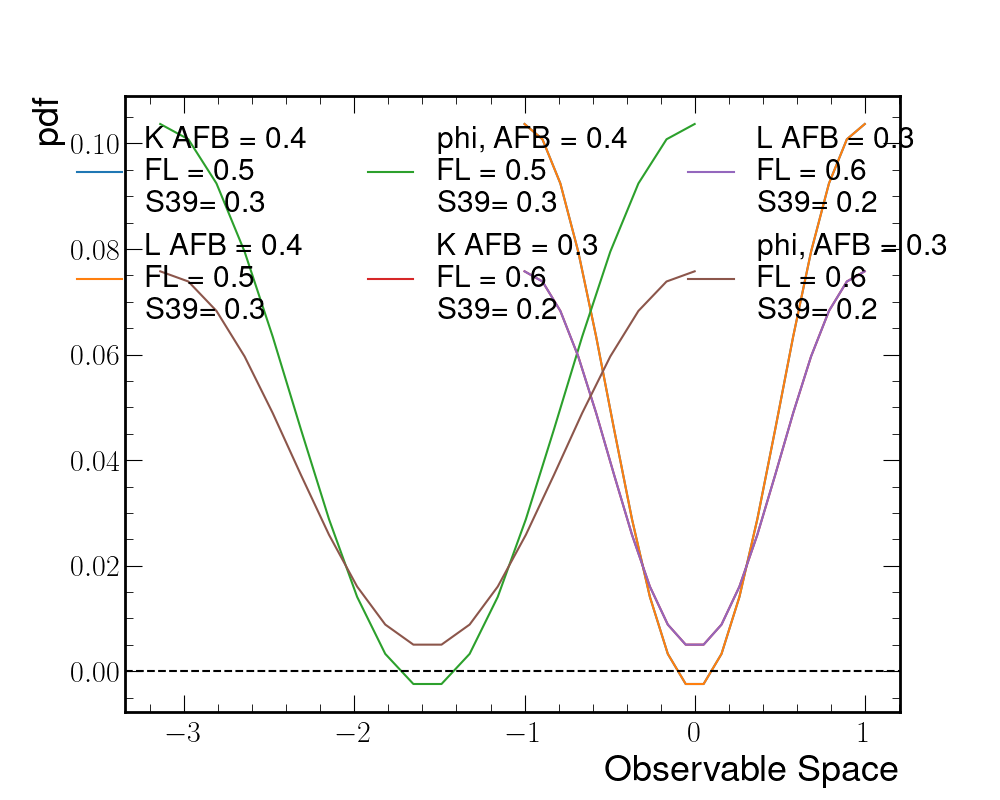

In [121]:
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(10, 8))
for afb,fl, s39 in zip(AFB_lst, FL_lst, S39_lst):
    AFB.set_value(afb)
    FL.set_value(fl)
    S39.set_value(s39)
    decay_rate_lst.append(decayWidth(FL, AFB, S39, combined_obs))
    plt.plot(cosThetaK_np, decay_rate_lst[-1].pdf(complete_space_np)[:][10][10].numpy(), label=f'K AFB = {afb}\nFL = {fl}\nS39= {s39}')
    plt.plot(cosThetaL_np, decay_rate_lst[-1].pdf(complete_space_np)[10][:][10].numpy(), label=f'L AFB = {afb}\nFL = {fl}\nS39= {s39}')
    plt.plot(phi_np, decay_rate_lst[-1].pdf(complete_space_np)[10][10][:].numpy(), label=f'phi, AFB = {afb}\nFL = {fl}\nS39= {s39}')

#AFB.set_value(0), FH.set_value(0)
#plt.plot(cos_np, decay_rate.pdf(cos_np), label=f'AFB = {0}\nFH = {0.02}', linewidth=5, color='black', ls='-')

# # Shrink current axis's height by 10% on the bottom
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width, box.height * 1])

# Put a legend below current axis
ax.legend(loc='upper center', #bbox_to_anchor=(0.5, -0.15),
           fancybox=True, shadow=True, ncol=3)
plt.axhline(0, color='black', ls='--')
plt.ylabel(r'pdf')
plt.xlabel(r'Observable Space')

In [98]:
AFB.set_value(0.4)
FL.set_value(0.5)
S39.set_value(0.3)

# This point is outside the constraints

dr = decayWidth(FL, AFB, S39, combined_obs) # Crea una PDF del Base PDF de zfit

In [99]:
AFB_val = dr.params['AFB'].value().numpy()
FL_val = dr.params['FL'].value().numpy()
S39_val = dr.params['S39'].value().numpy()

AFB.set_value(AFB_val),
FL.set_value(FL_val)
S39.set_value(S39_val)

filename = f'{path}drs_AFB_{AFB_val}_FH_{FL_val}_S39_{S39}.npy'

# The PDf doesn´t save the values of the parameters themselves
# AFB.set_value(decay_rate_lst[-1].params['AFB'].value().numpy())
# FH.set_value(decay_rate_lst[-1].params['FH'].value().numpy())

sampler = dr.create_sampler(sampler_size)

if os.path.exists(filename):
    #sampler_lst.append(sampler.from_numpy(cos, np.load(filename)))
    sampler = sampler.from_numpy(complete_space, np.load(filename))
else:
    sampler.resample()
    np.save(filename, sampler.numpy())
    #sampler_lst.append(sampler)
#print(sampler_lst[-1])


In [100]:
AFB.value().numpy()

0.4

In [129]:
sampler.value()

<tf.Tensor: shape=(100000, 3), dtype=float64, numpy=
array([[ 0.96217621, -0.43342941, -2.78289969],
       [-0.69734224,  0.58442995, -2.20221654],
       [-0.36460039,  0.36640785, -2.94590919],
       ...,
       [-0.8764624 , -0.82281181, -1.57681663],
       [-0.13919264, -0.18103886, -3.10695638],
       [ 0.68124723,  0.9103952 , -1.82843821]])>

In [133]:
sampler.dataset.tensor

<tf.Tensor: shape=(100000, 3), dtype=float64, numpy=
array([[ 0.96217621, -0.43342941, -2.78289969],
       [-0.69734224,  0.58442995, -2.20221654],
       [-0.36460039,  0.36640785, -2.94590919],
       ...,
       [-0.8764624 , -0.82281181, -1.57681663],
       [-0.13919264, -0.18103886, -3.10695638],
       [ 0.68124723,  0.9103952 , -1.82843821]])>

In [126]:
sampler.numpy().shape

(100000, 3)

In [101]:
sampler.axes

(0, 1, 2)

In [102]:
dir(sampler)

['BATCH_SIZE',
 '_N_OBS',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_approx_nevents',
 '_cache',
 '_cachers',
 '_check_convert_value',
 '_check_input_data_range',
 '_check_n_obs',
 '_clean_cache',
 '_convert_sort_space',
 '_copy',
 '_cut_data',
 '_data_range',
 '_dtype',
 '_get_nevents',
 '_hashint',
 '_inform_cachers',
 '_name',
 '_nevents',
 '_next_batch',
 '_original_space',
 '_permutation_indices_data',
 '_repr',
 '_set_space',
 '_set_weights',
 '_sort_value',
 '_space',
 '_update_hash',
 '_use_hash',
 '_value_internal',
 '_weights',
 'add_cache_deps',
 'axes',
 'copy',
 

In [103]:
sampler.numpy()[:,0]

array([ 0.96217621, -0.69734224, -0.36460039, ..., -0.8764624 ,
       -0.13919264,  0.68124723])

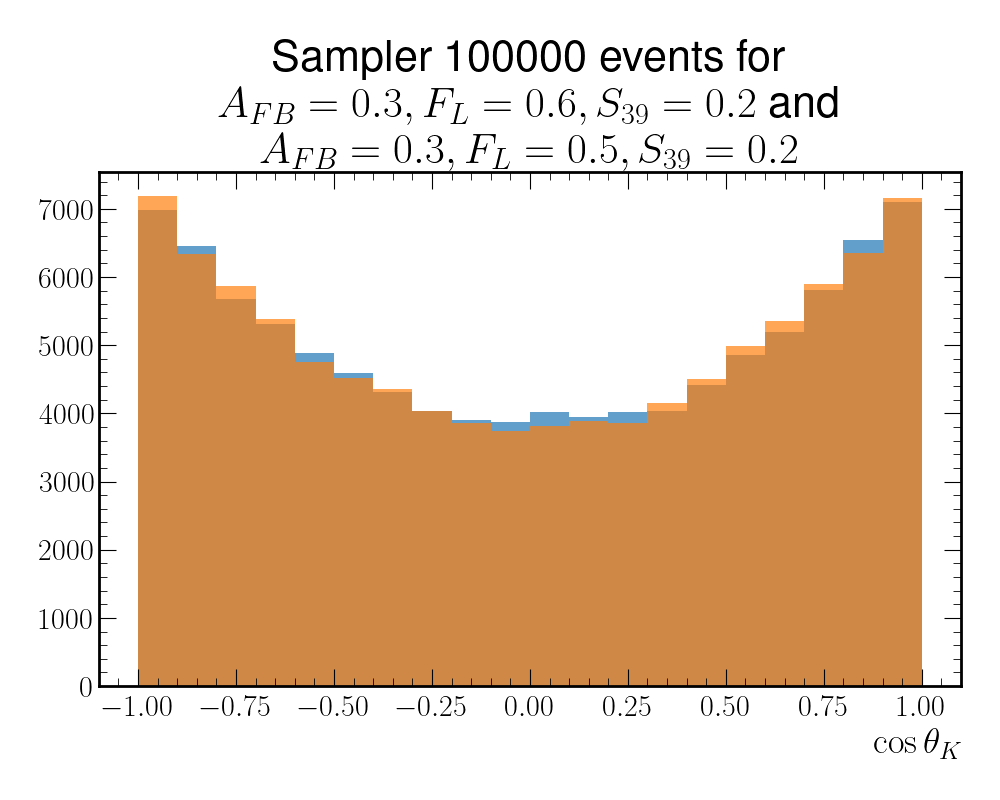

In [122]:
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(10, 8), tight_layout=True)
ax.hist(sampler.numpy()[:,0], bins=20, range=[-1,1], alpha=0.7)
ax.hist(sampler_1.numpy()[:,0], bins=20, range=[-1,1], alpha=0.7)
ax.set_title("Sampler "+str(int(sampler_size))+" events for \n"+
            "$A_{FB}="+str(AFB.value().numpy())+", F_L="+str(FL.value().numpy())+", S_{39}="+str(S39.value().numpy())+"$ and \n"+
            "$A_{FB}=0.3, F_L=0.5, S_{39}=0.2$")
ax.set_xlabel("$\\cos \\theta_K$")
plt.show()

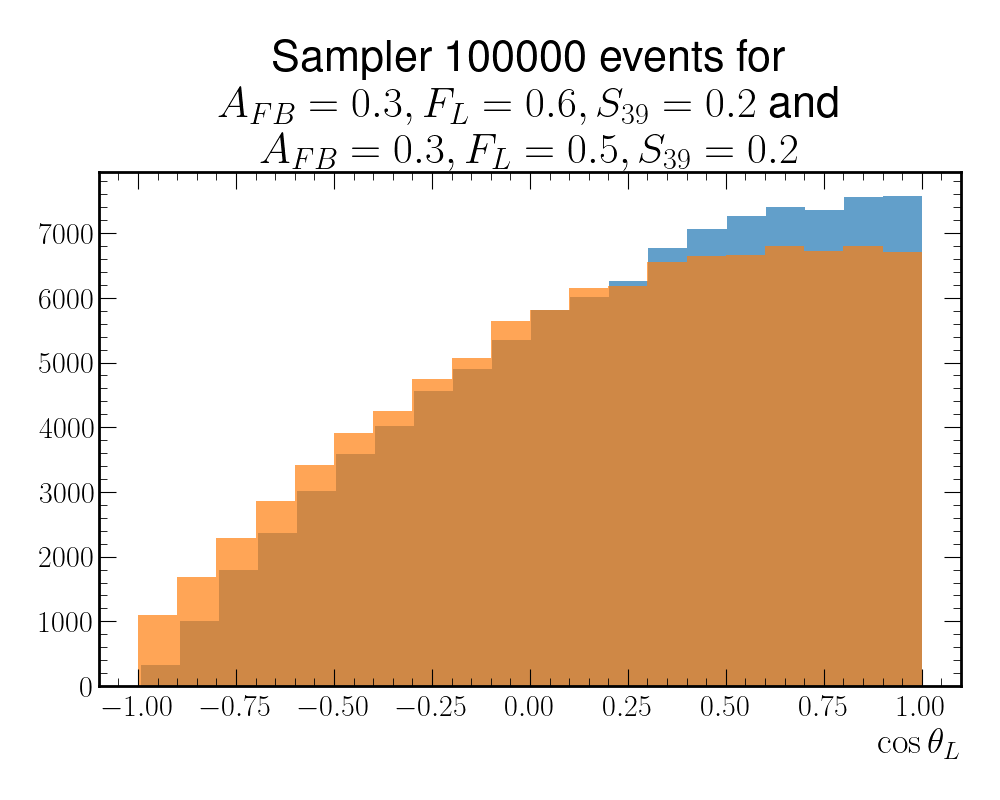

In [123]:
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(10, 8), tight_layout=True)
ax.hist(sampler.numpy()[:,1], bins=20,  alpha=0.7)
ax.hist(sampler_1.numpy()[:,1], bins=20,  alpha=0.7)
ax.set_title("Sampler "+str(int(sampler_size))+" events for \n"+
            "$A_{FB}="+str(AFB.value().numpy())+", F_L="+str(FL.value().numpy())+", S_{39}="+str(S39.value().numpy())+"$ and \n"+
            "$A_{FB}=0.3, F_L=0.5, S_{39}=0.2$")
ax.set_xlabel("$\\cos \\theta_L$")
plt.show()

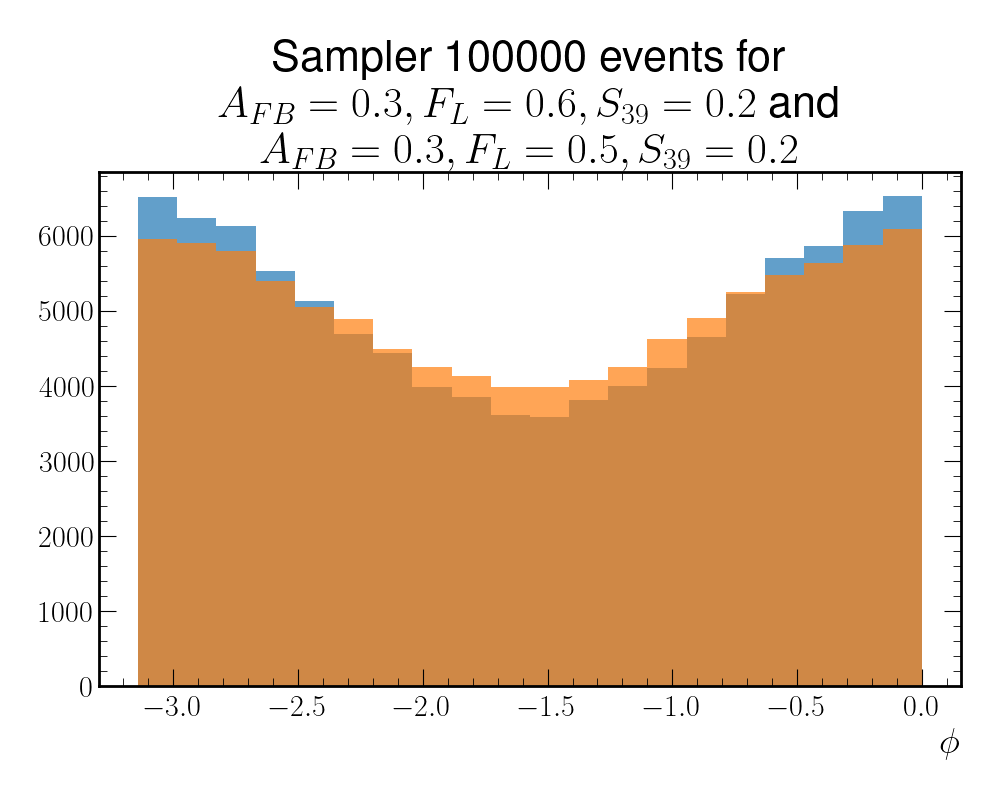

In [124]:
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(10, 8), tight_layout=True)
ax.hist(sampler.numpy()[:,2], bins=20, alpha=0.7)
ax.hist(sampler_1.numpy()[:,2], bins=20, alpha=0.7)
ax.set_title("Sampler "+str(int(sampler_size))+" events for \n"+
            "$A_{FB}="+str(AFB.value().numpy())+", F_L="+str(FL.value().numpy())+", S_{39}="+str(S39.value().numpy())+"$ and \n"+
            "$A_{FB}=0.3, F_L=0.5, S_{39}=0.2$")
ax.set_xlabel("$\\phi$")
plt.show()

In [113]:
# for i in range(18):
#     plt.close()